# Example of multi-panel plotting of all galaxies in HDF5 file.

In [1]:
import numpy as np
from edge_pydb import EdgeTable
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from edge_pydb.plotting import gridplot

In [2]:
sspcols  = ['Name','ix','iy','sigstar_sm','fe_sigstar_sm']
fluxcols = ['Name','ix','iy','EW_Halpha_sm','flux_sigsfr0_sm','e_flux_sigsfr0_sm']

fluxtab = EdgeTable('edge.pipe3d.hdf5', path='flux_elines_sm', cols=fluxcols)
ssptab = EdgeTable('edge.pipe3d.hdf5', path='SSP_sm', cols=sspcols)
print('Working on full EDGE database')

# consolidate the tables and calculate sSFR
fluxtab.join(ssptab, keys=['Name', 'ix', 'iy'])
fluxtab['specSFR'] = fluxtab['flux_sigsfr0_sm'].quantity/fluxtab['sigstar_sm'].quantity
# Halpha EW image values are negative
fluxtab['EW_Halpha_sm'] = -fluxtab['EW_Halpha_sm']
print(fluxtab.colnames)

Working on full EDGE database
['Name', 'ix', 'iy', 'EW_Halpha_sm', 'flux_sigsfr0_sm', 'e_flux_sigsfr0_sm', 'sigstar_sm', 'fe_sigstar_sm', 'specSFR']


In [3]:
gallist = list(np.unique(fluxtab['Name']))
print(gallist)

['ARP220', 'IC0480', 'IC0540', 'IC0944', 'IC1151', 'IC1199', 'IC1683', 'IC2247', 'IC2487', 'IC4566', 'IC5376', 'NGC0444', 'NGC0447', 'NGC0477', 'NGC0496', 'NGC0523', 'NGC0528', 'NGC0551', 'NGC1167', 'NGC2253', 'NGC2347', 'NGC2410', 'NGC2480', 'NGC2487', 'NGC2623', 'NGC2639', 'NGC2730', 'NGC2880', 'NGC2906', 'NGC2916', 'NGC2918', 'NGC3303', 'NGC3381', 'NGC3687', 'NGC3811', 'NGC3815', 'NGC3994', 'NGC4047', 'NGC4149', 'NGC4185', 'NGC4210', 'NGC4211NED02', 'NGC4470', 'NGC4644', 'NGC4676A', 'NGC4711', 'NGC4961', 'NGC5000', 'NGC5016', 'NGC5056', 'NGC5205', 'NGC5218', 'NGC5394', 'NGC5406', 'NGC5480', 'NGC5485', 'NGC5520', 'NGC5614', 'NGC5633', 'NGC5657', 'NGC5682', 'NGC5732', 'NGC5784', 'NGC5876', 'NGC5908', 'NGC5930', 'NGC5934', 'NGC5947', 'NGC5953', 'NGC5980', 'NGC6004', 'NGC6021', 'NGC6027', 'NGC6060', 'NGC6063', 'NGC6081', 'NGC6125', 'NGC6146', 'NGC6155', 'NGC6168', 'NGC6186', 'NGC6301', 'NGC6310', 'NGC6314', 'NGC6361', 'NGC6394', 'NGC6478', 'NGC7738', 'NGC7819', 'UGC00809', 'UGC03253', '

## SFR map without extinction correction

Plotting ARP220 to NGC4211NED02


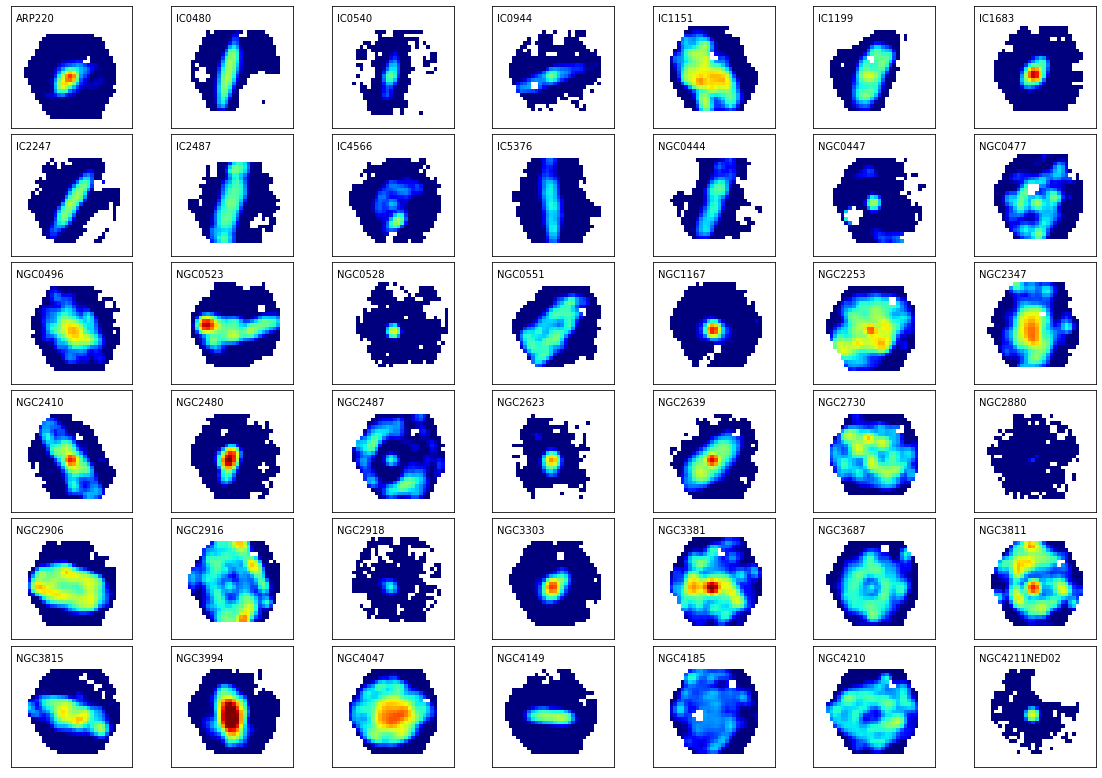

Plotting NGC4470 to NGC6314


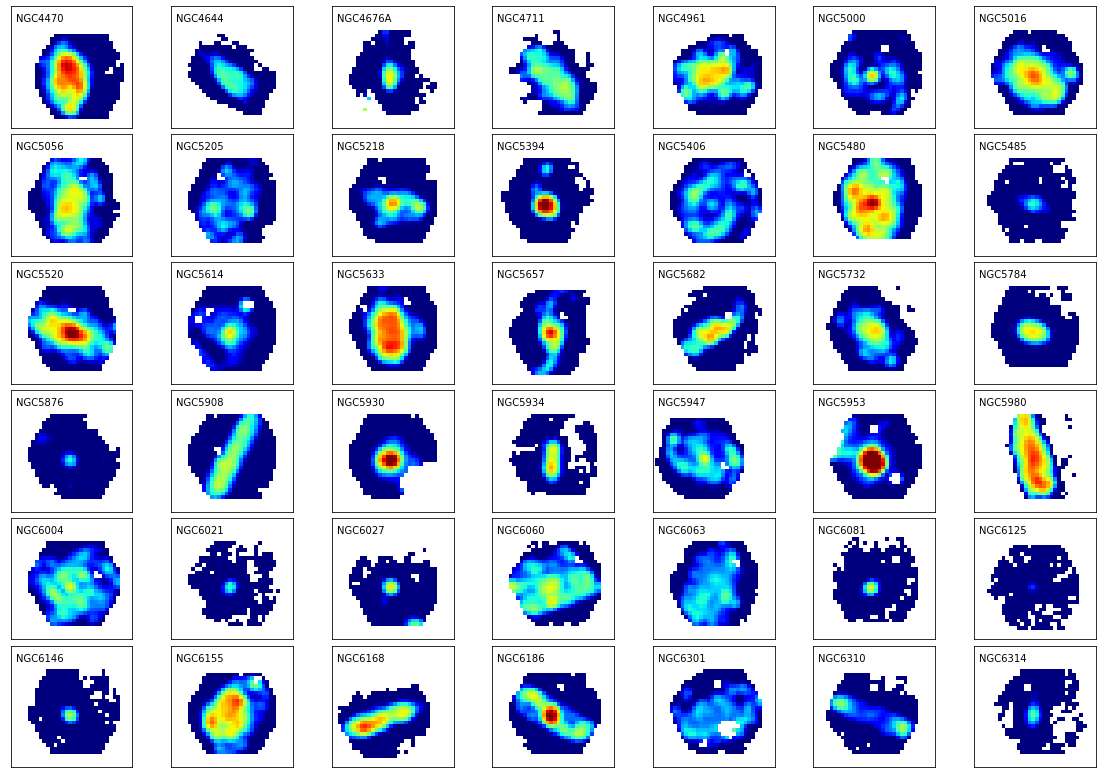

Plotting NGC6361 to UGC10710


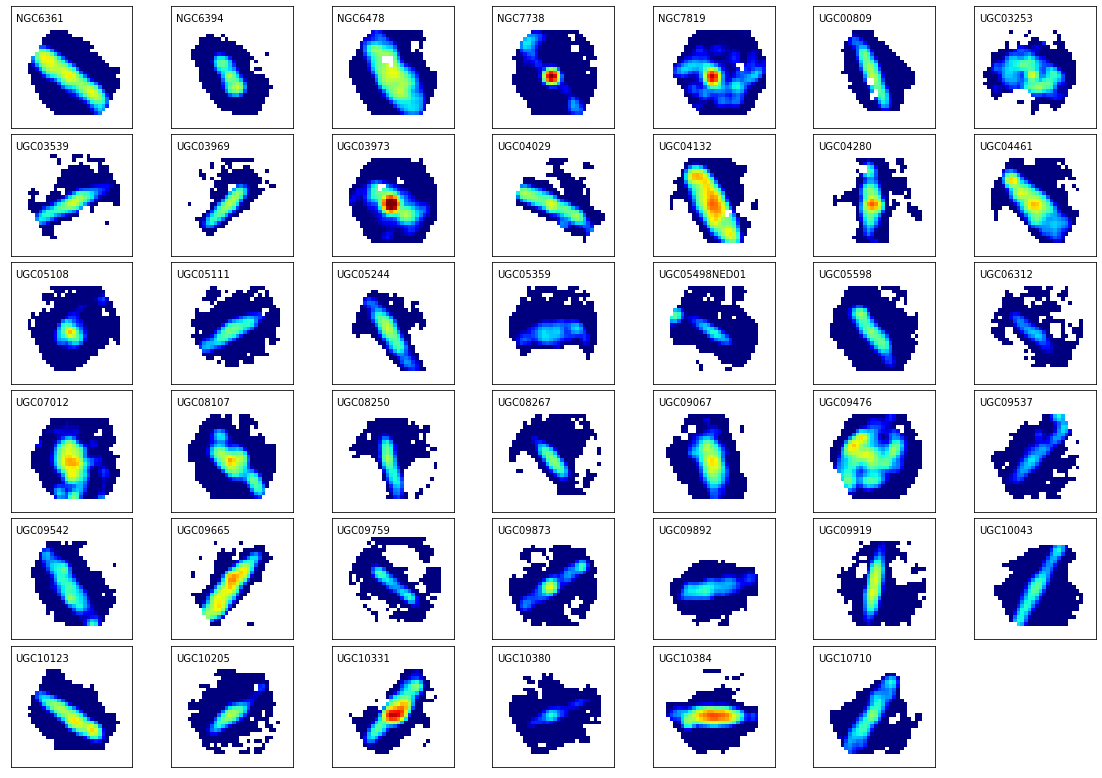

In [4]:
gridplot(edgetab=fluxtab, gallist=gallist, column='flux_sigsfr0_sm', plotstyle='image',
        xrange=[5,38], yrange=[7,40], norm=LogNorm(vmin=1, vmax=100))

## SFR map without extinction correction, SNR > 3 cut

Plotting ARP220 to NGC4211NED02


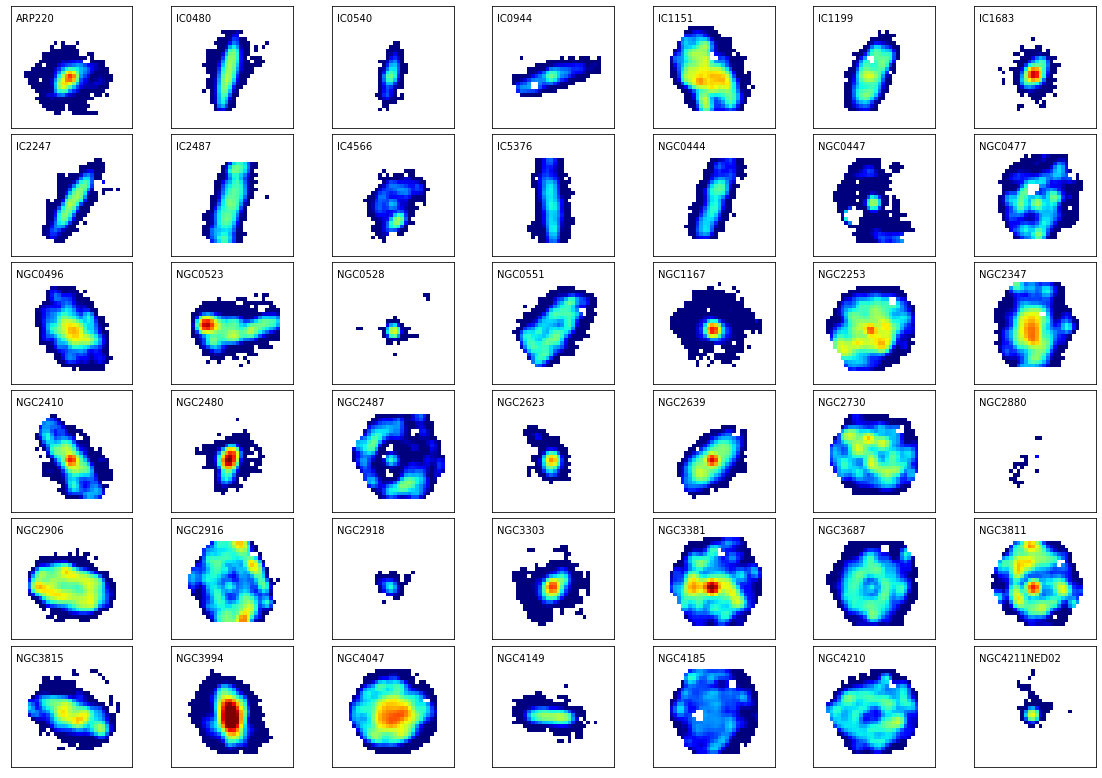

Plotting NGC4470 to NGC6314


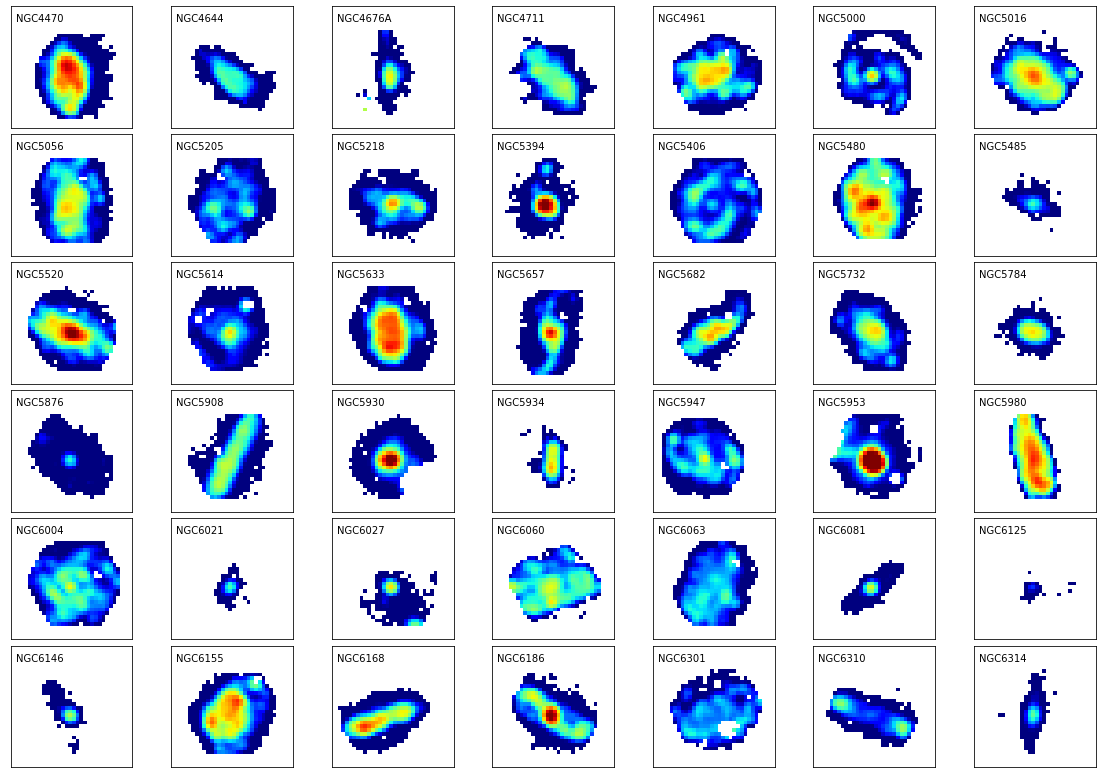

Plotting NGC6361 to UGC10710


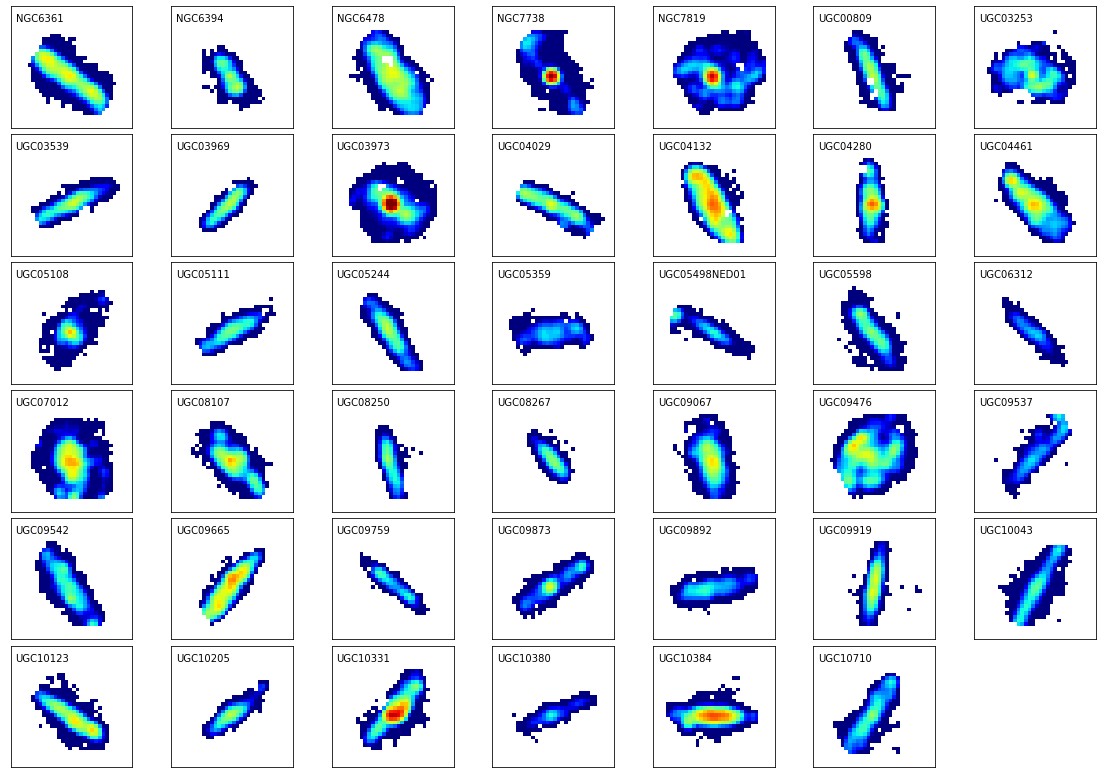

In [5]:
flag = (fluxtab['flux_sigsfr0_sm'] < 3*fluxtab['e_flux_sigsfr0_sm'])
gridplot(edgetab=fluxtab, gallist=gallist, column='flux_sigsfr0_sm', plotstyle='image',
        xrange=[5,38], yrange=[7,40], norm=LogNorm(vmin=1, vmax=100), blank=flag)

## Stellar surface density map without extinction correction

Plotting ARP220 to NGC4211NED02


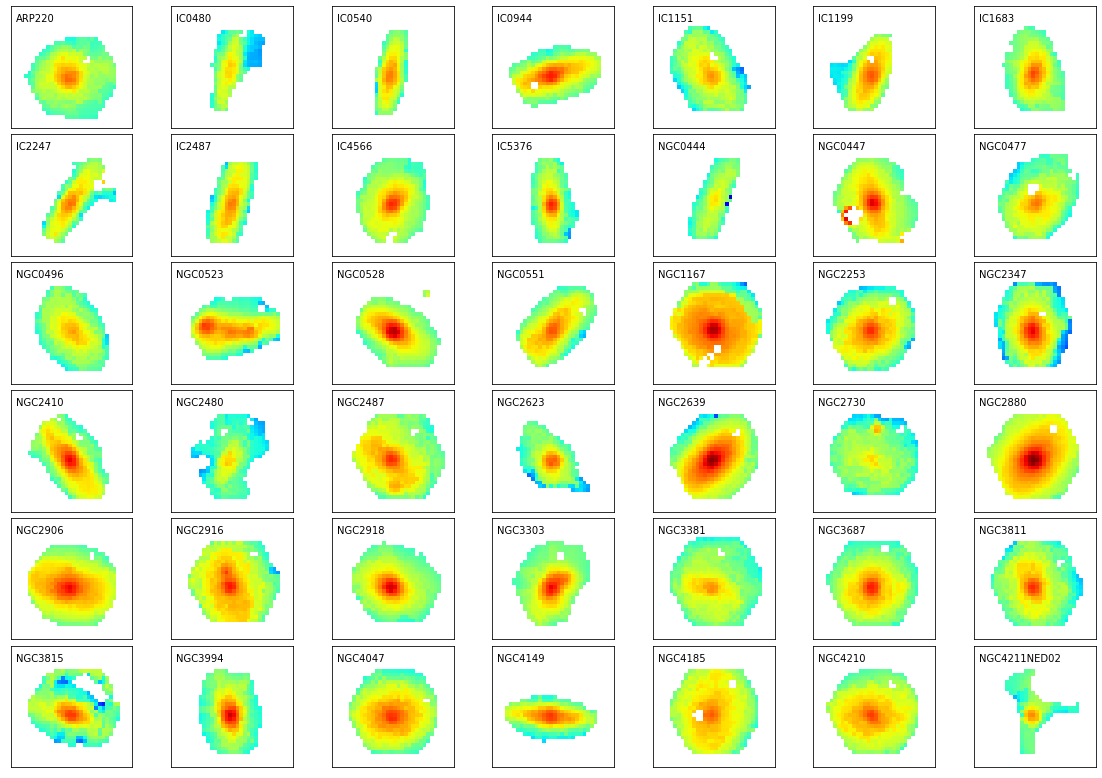

Plotting NGC4470 to NGC6314


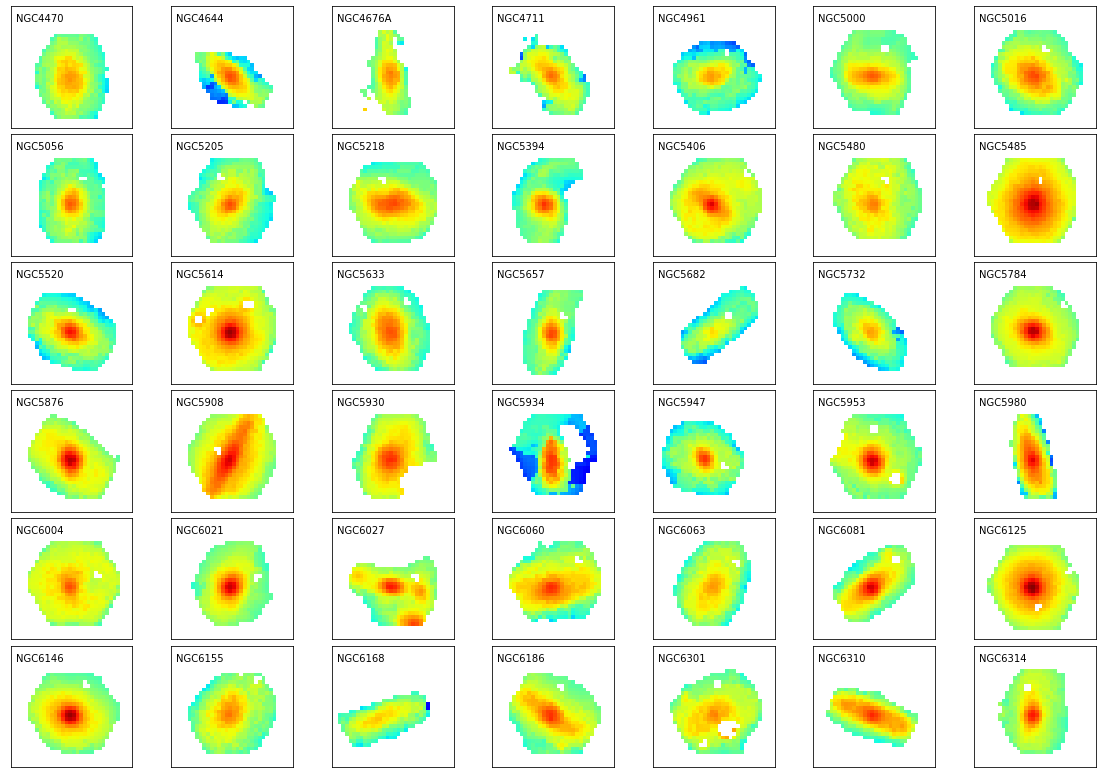

Plotting NGC6361 to UGC10710


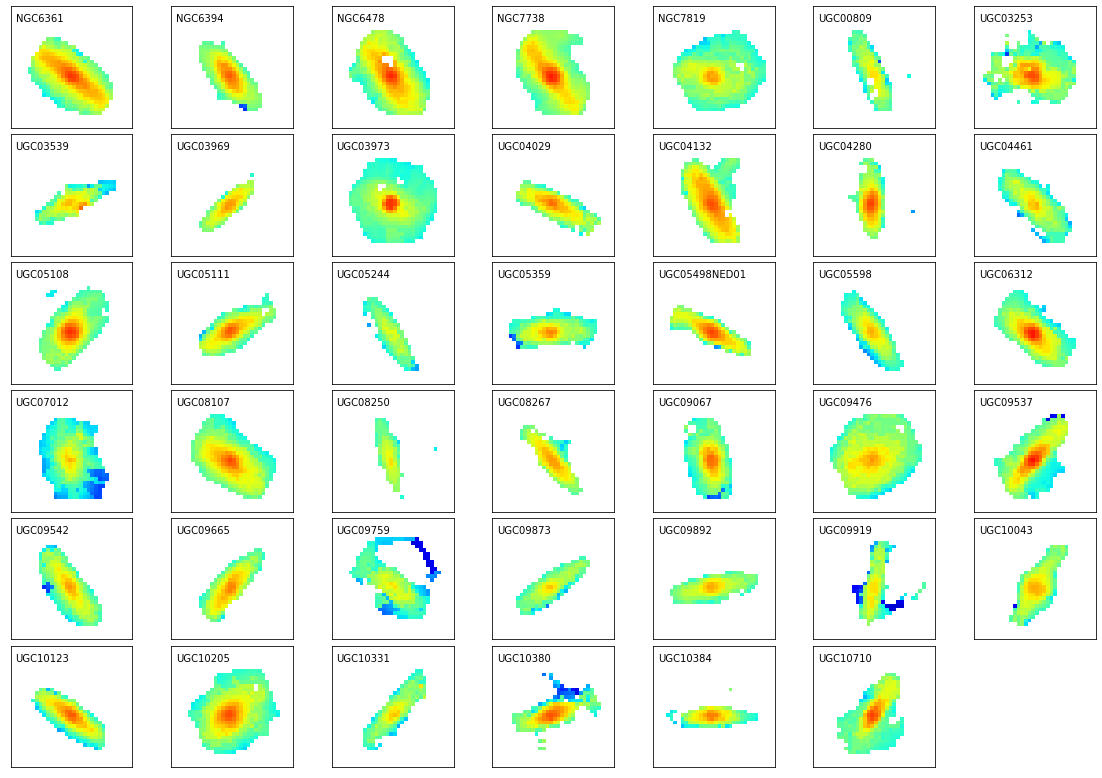

In [6]:
gridplot(edgetab=fluxtab, gallist=gallist, column='sigstar_sm', plotstyle='image',
        xrange=[5,38], yrange=[7,40], norm=LogNorm(vmin=0.1, vmax=10000))

## Specific SFR map

Plotting ARP220 to NGC4211NED02


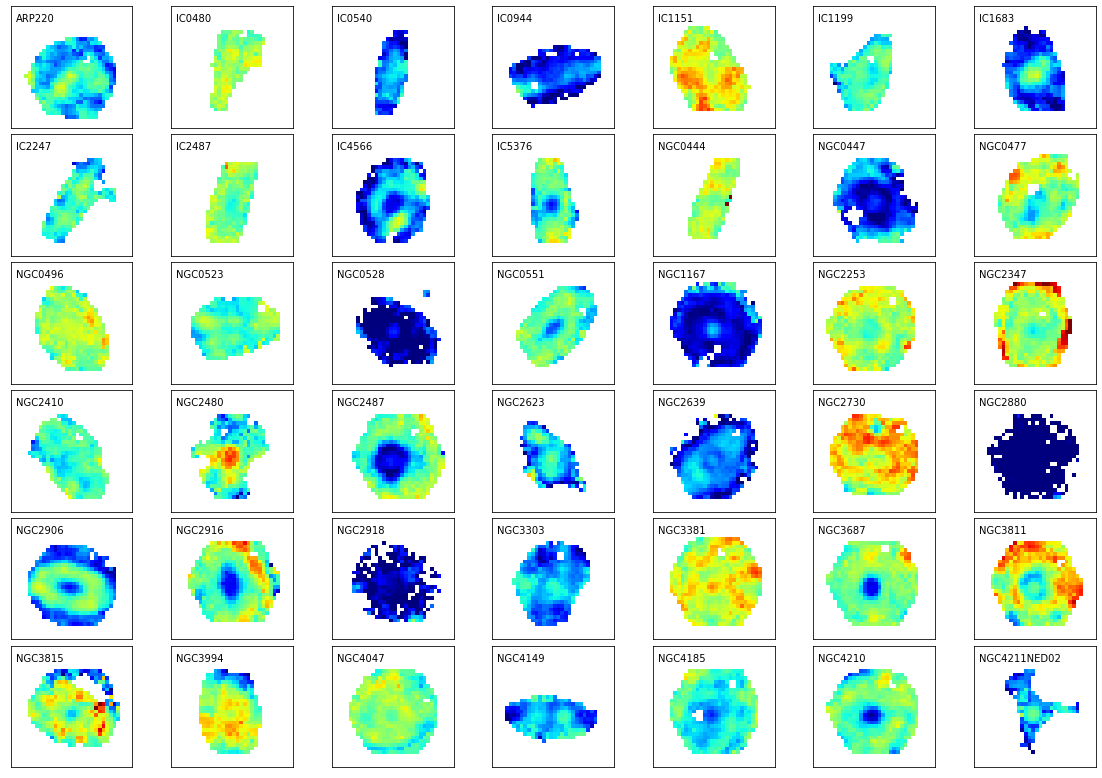

Plotting NGC4470 to NGC6314


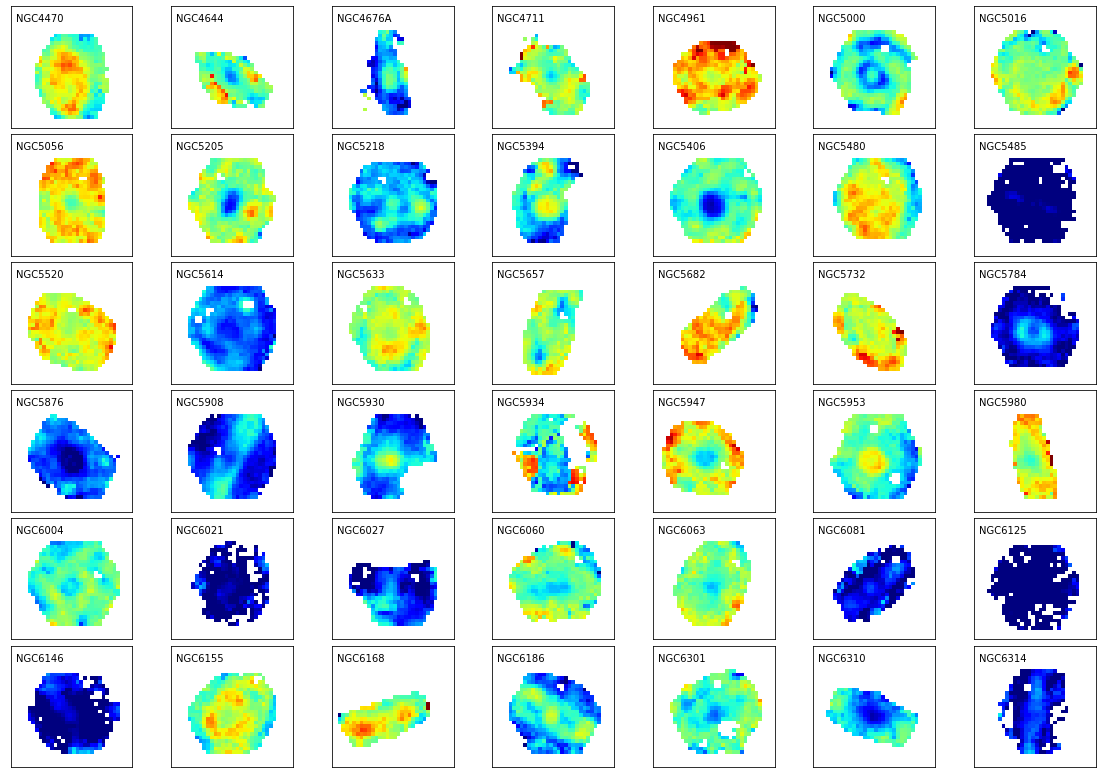

Plotting NGC6361 to UGC10710


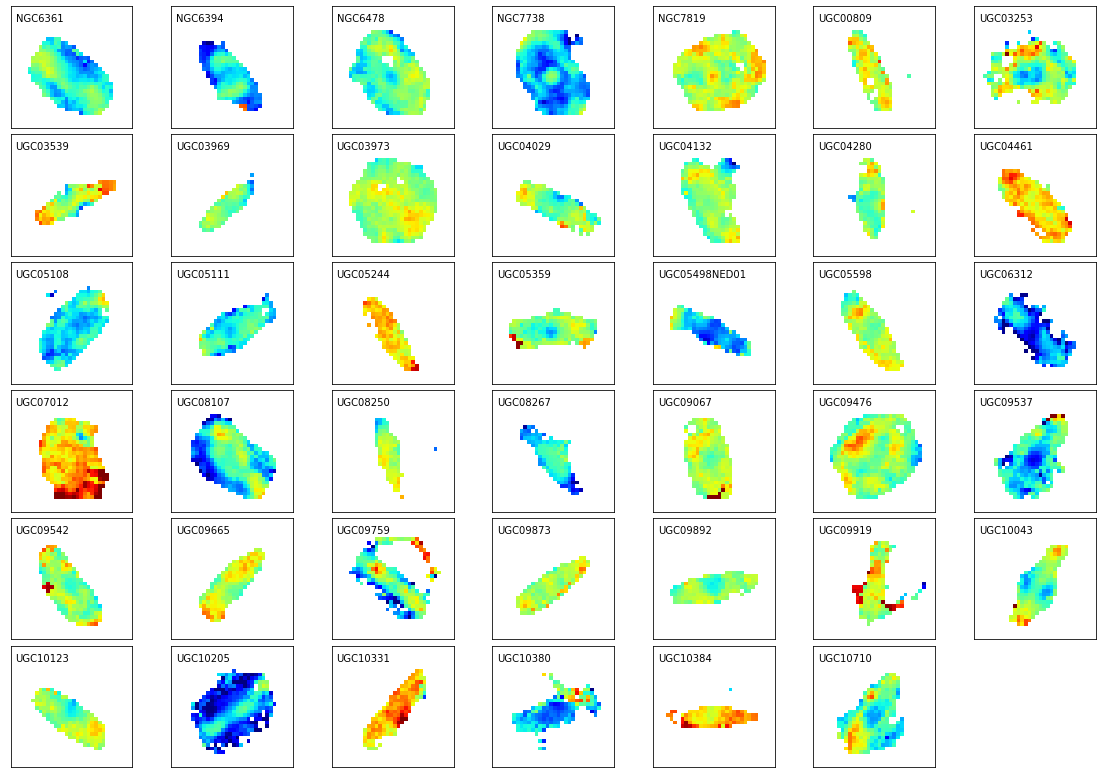

In [7]:
# vmin and vmax in Gyr^{-1}
gridplot(edgetab=fluxtab, gallist=gallist, column='specSFR', plotstyle='image',
        xrange=[5,38], yrange=[7,40], norm=LogNorm(vmin=0.001, vmax=1))

## H$\alpha$ equivalent width map

Plotting ARP220 to NGC4211NED02


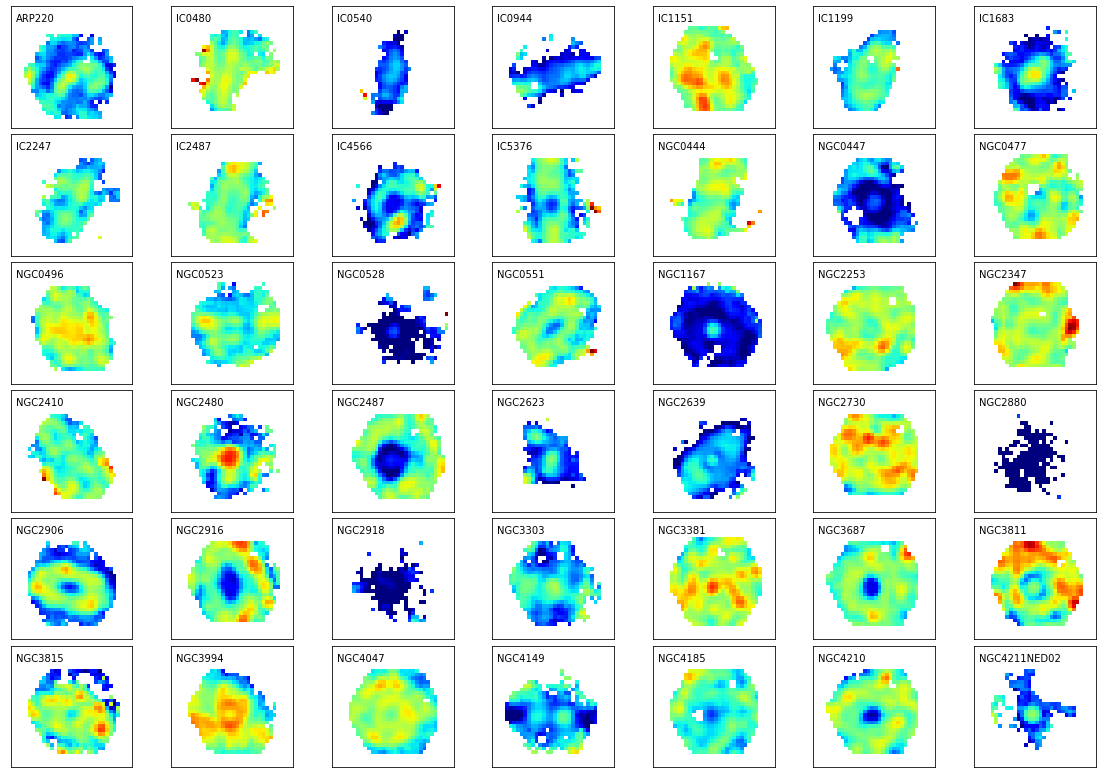

Plotting NGC4470 to NGC6314


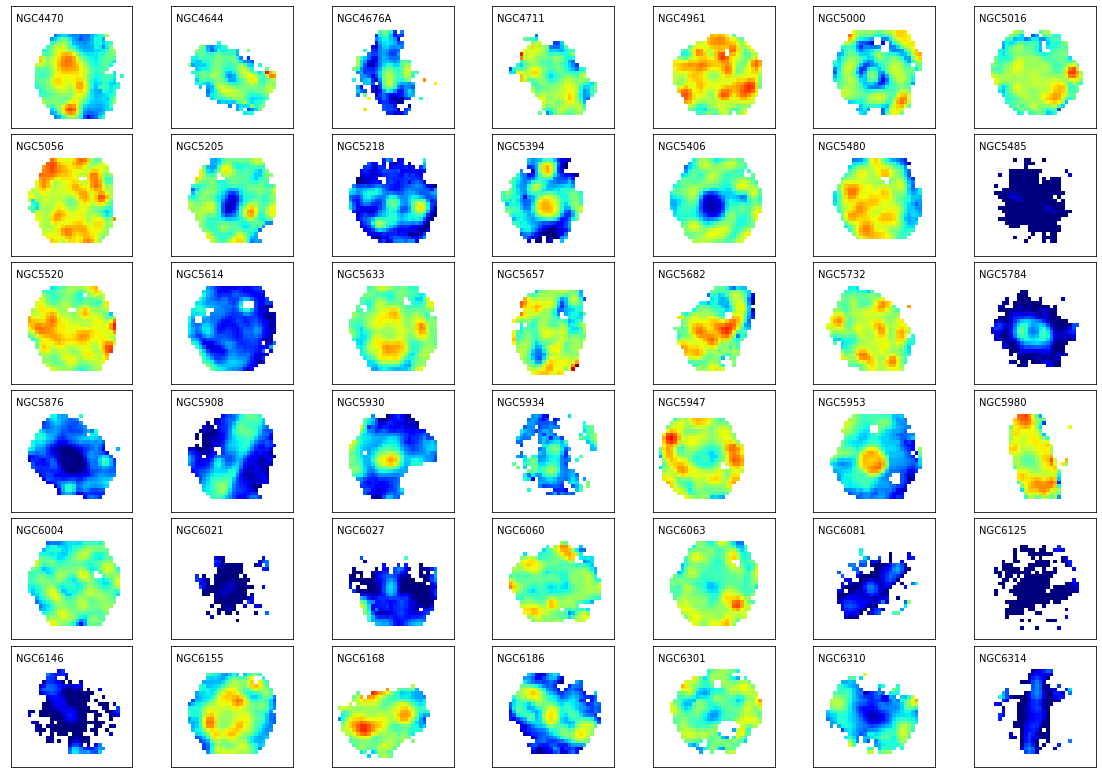

Plotting NGC6361 to UGC10710


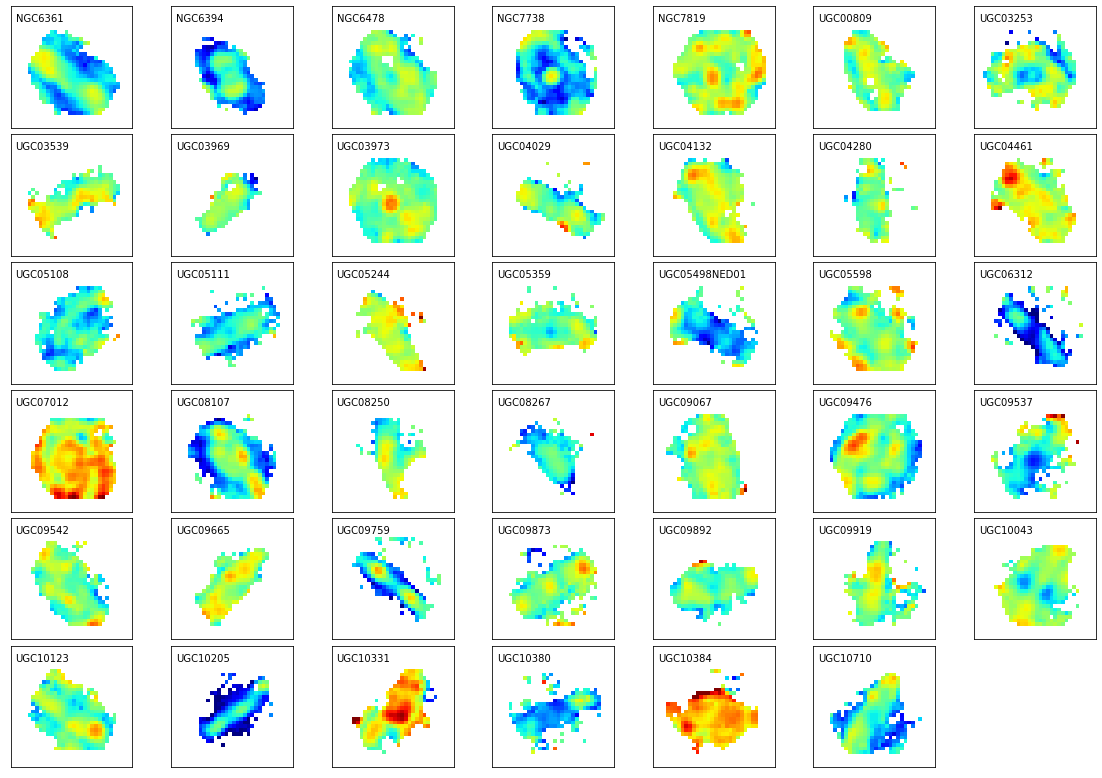

In [8]:
# vmin and vmax in Angstrom
gridplot(edgetab=fluxtab, gallist=gallist, column='EW_Halpha_sm', plotstyle='image',
        xrange=[5,38], yrange=[7,40], norm=LogNorm(vmin=1, vmax=200))